# Importação de bibliotecas e base de dados

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Activation, AveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raio_x_imagens = '/content/drive/MyDrive/Dataset'
os.listdir(raio_x_imagens)

['.DS_Store', '0', '3', '1', '2']

In [4]:
image_generator = ImageDataGenerator(rescale=1./255)

In [5]:
treino_generator = image_generator.flow_from_directory(batch_size = 40, directory=raio_x_imagens, shuffle=True, target_size=(256, 256), class_mode='categorical', subset='training')
# target_size para ser definido preciso conhecer a estrutura da rede neural que vou trabalhar

Found 532 images belonging to 4 classes.


In [6]:
imagens_treino, label_treino = next(treino_generator)

In [7]:
label_nomes = {0 : 'Covid19', 1: 'Normal', 2: 'Pneumonia viral', 3: 'Pneumonia bacterial'}

# Visualização de Dados

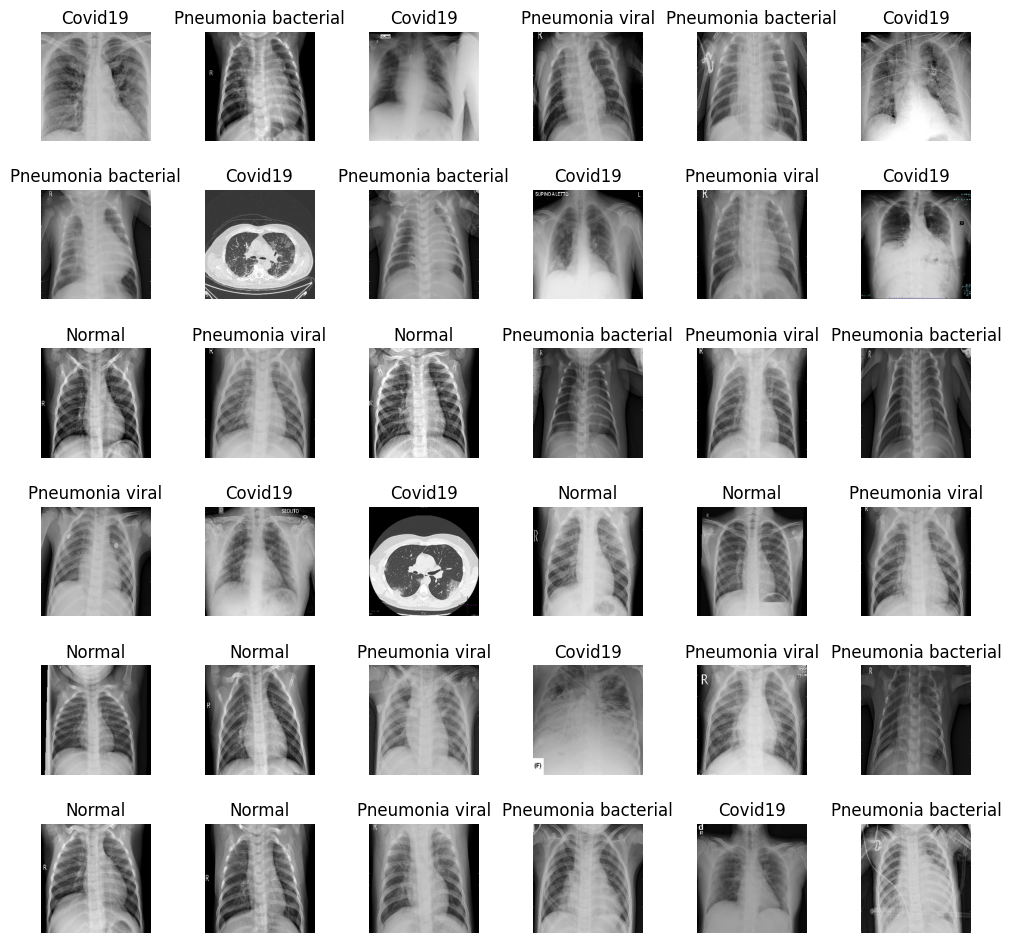

In [8]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(36):
    axes[i].imshow(imagens_treino[i])
    axes[i].set_title(label_nomes[np.argmax(label_treino[i])])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

# Carregamento da rede neural com pesos pré-treinados

In [9]:
base_modelo = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(256, 256, 3)))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
base_modelo.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

Irei utilizar os mesmos pesos e camadas, sendo assim, na criação da rede neural não precisarei treina-lá totalmente, somente as camadas de entrada e saída

In [11]:
for camada in base_modelo.layers[:-10]:
    camada.trainable = False

Se esse código não for executado os pesos das camadas serão iniciados em 0, se ***camada.trainable = True***, usaríamos apenas a arquitetura da ResNet sem o treinamento previamente definido.

# Construção e treinamento do modelo de deep learning

In [12]:
novo_modelo = base_modelo.output
novo_modelo = AveragePooling2D(pool_size=(2, 2), strides= 2, padding='valid')(novo_modelo)
novo_modelo = Flatten(name='flatten')(novo_modelo)
novo_modelo = Dense(256, activation='relu')(novo_modelo)
novo_modelo = Dropout(0.2)(novo_modelo)
novo_modelo = Dense(128, activation='relu')(novo_modelo)
novo_modelo = Dropout(0.2)(novo_modelo)
novo_modelo = Dense(64, activation='relu')(novo_modelo)
novo_modelo = Dense(4, activation='softmax')(novo_modelo)

In [13]:
modelo_final = Model(inputs=base_modelo.input, outputs=novo_modelo)

In [14]:
modelo_final.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(learning_rate= 1e-4, weight_decay=1e-6), metrics = ['accuracy'])

Salvar o modelo pois demora para treinar

In [15]:
checkpoint = ModelCheckpoint('pesos.h5')

In [16]:
treino_generator = image_generator.flow_from_directory(batch_size = 5, directory=raio_x_imagens, shuffle=True, target_size=(256, 256), class_mode='categorical', subset='training')
# Mudando batch size para 4 pois o calculo do erro e o ajuste dos pesos será feito de 4 em 4 imagens, se deixar 40 irá ocorrer um erro por causa da quantidade das imagens que temos

Found 532 images belonging to 4 classes.


In [17]:
historico_treinamento = modelo_final.fit(treino_generator, epochs=15, callbacks=[checkpoint])

Epoch 1/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3154 - loss: 1.6477

107/107 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.3157 - loss: 1.6459
Epoch 2/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4721 - loss: 1.2061

107/107 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.4721 - loss: 1.2059
Epoch 3/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5058 - loss: 1.0860

107/107 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.5061 - loss: 1.0859
Epoch 4/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6061 - loss: 0.9504

107/107 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6059 - loss: 0.9503
Epoch 5/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6094 - loss: 0.9033

107/107 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.6095 - loss: 0.9032
Epoch 6/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7291 - loss: 0.6931

107/107 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7290 - loss: 0.6935
Epoch 7/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7350 - loss: 0.7425

107/107 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7351 - loss: 0.7417
Epoch 8/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7779 - loss: 0.5934

107/107 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7776 - loss: 0.5938
Epoch 9/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7840 - loss: 0.6373

107/107 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.7841 - loss: 0.6369
Epoch 10/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7866 - loss: 0.6216

107/107 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.7867 - loss: 0.6212
Epoch 11/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8171 - loss: 0.4964

107/107 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8170 - loss: 0.4970
Epoch 12/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8155 - loss: 0.4840

107/107 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8155 - loss: 0.4843
Epoch 13/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8576 - loss: 0.4296

107/107 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.8573 - loss: 0.4306
Epoch 14/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8543 - loss: 0.4514

107/107 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.8542 - loss: 0.4516
Epoch 15/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8463 - loss: 0.4135

107/107 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8462 - loss: 0.4136


# Avaliação da Rede Neural

In [18]:
historico_treinamento.history.keys()

dict_keys(['accuracy', 'loss'])

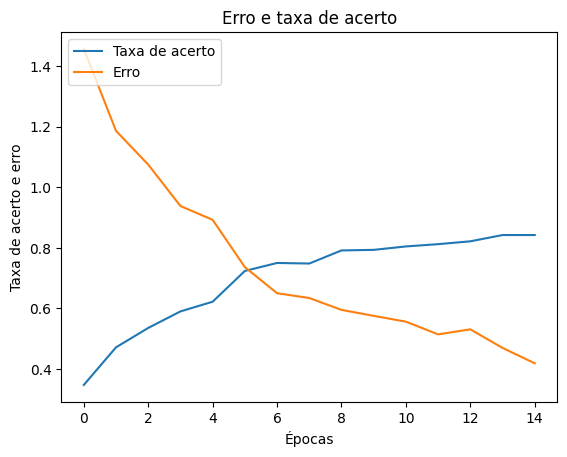

In [19]:
plt.plot(historico_treinamento.history['accuracy'])
plt.plot(historico_treinamento.history['loss'])
plt.title('Erro e taxa de acerto')
plt.xlabel('Épocas')
plt.ylabel('Taxa de acerto e erro')
plt.legend(['Taxa de acerto', 'Erro'], loc='upper left');


In [20]:
teste_pasta = '/content/drive/MyDrive/Test'

In [21]:
teste_gen = ImageDataGenerator(rescale=1./255)
teste_generator = teste_gen.flow_from_directory(batch_size = 40, directory=teste_pasta, shuffle=True, target_size=(256, 256), class_mode='categorical')

Found 40 images belonging to 4 classes.


In [22]:
avaliacao = modelo_final.evaluate(teste_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.7000 - loss: 1.6879


In [24]:
predicao = []
original = []
imagem = []

for i in range(len(os.listdir(teste_pasta))):
  for item in os.listdir(os.path.join(teste_pasta, str(i))):
    #print(os.listdir(os.path.join(teste_pasta, str(i))))
    img = cv2.imread(os.path.join(teste_pasta, str(i), item))
    img = cv2.resize(img, (256, 256))
    imagem.append(img)
    img = img / 255
    img = img.reshape(-1, 256, 256, 3)
    predict = modelo_final.predict(img)
    predicao.append(np.argmax(predict))
    original.append(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
accuracy_score(original, predicao)

0.7

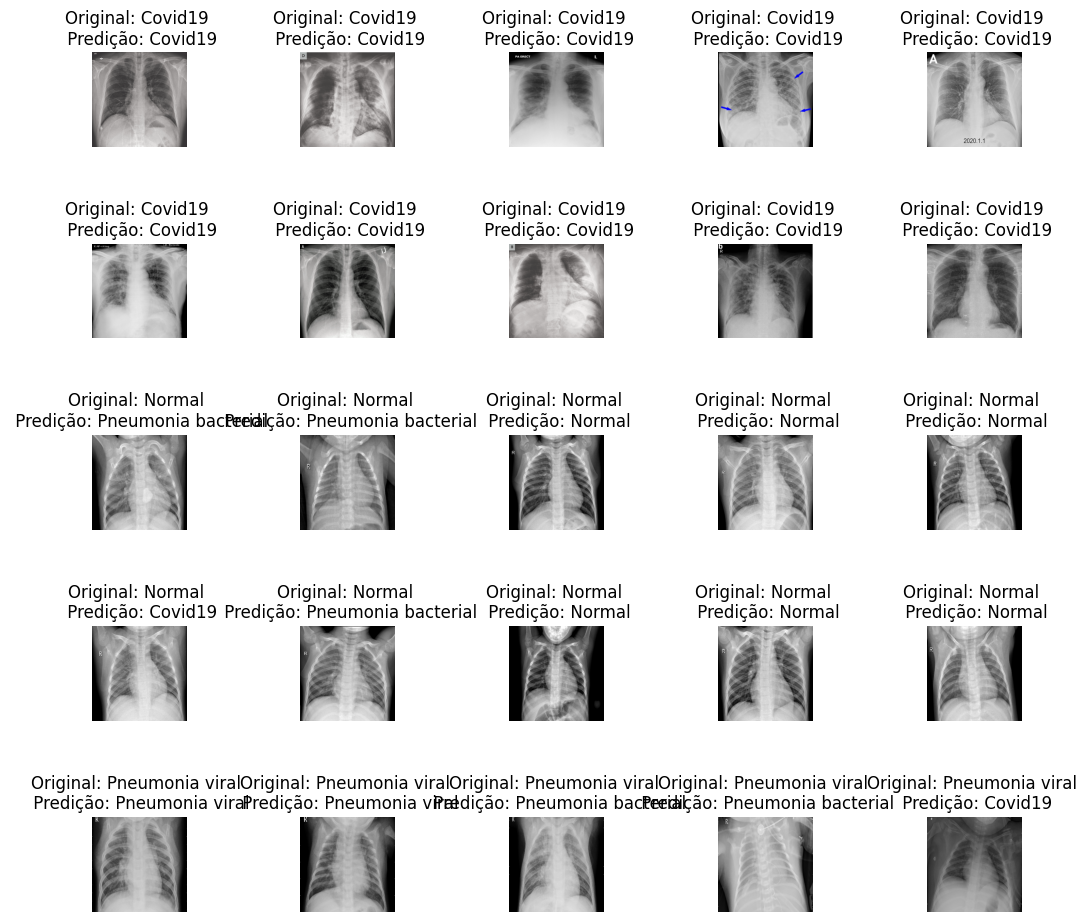

In [27]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(imagem[i])
    axes[i].set_title(f'Original: {label_nomes[original[i]]} \n Predição: {label_nomes[predicao[i]]}')
    axes[i].axis('off')
plt.subplots_adjust(wspace= 1.2)

<Axes: >

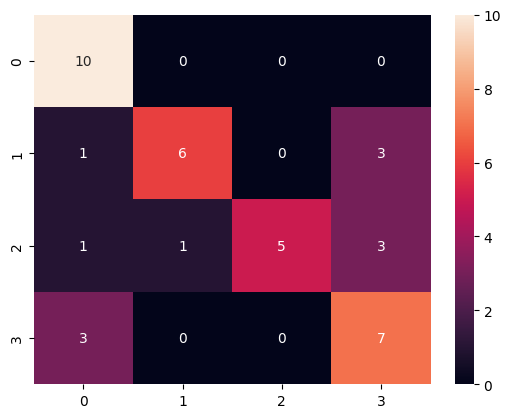

In [28]:
cm = confusion_matrix(original, predicao)
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(original, predicao, target_names=label_nomes.values()))

                     precision    recall  f1-score   support

            Covid19       0.67      1.00      0.80        10
             Normal       0.86      0.60      0.71        10
    Pneumonia viral       1.00      0.50      0.67        10
Pneumonia bacterial       0.54      0.70      0.61        10

           accuracy                           0.70        40
          macro avg       0.77      0.70      0.70        40
       weighted avg       0.77      0.70      0.70        40



# Classificação de um raio-x de paciente com Covid-19

In [30]:
from keras.models import load_model
modelo_carregado = load_model('pesos.h5')


In [31]:
img = cv2.imread('/content/drive/MyDrive/Test/0/radiol.2020200490.fig3.jpeg')

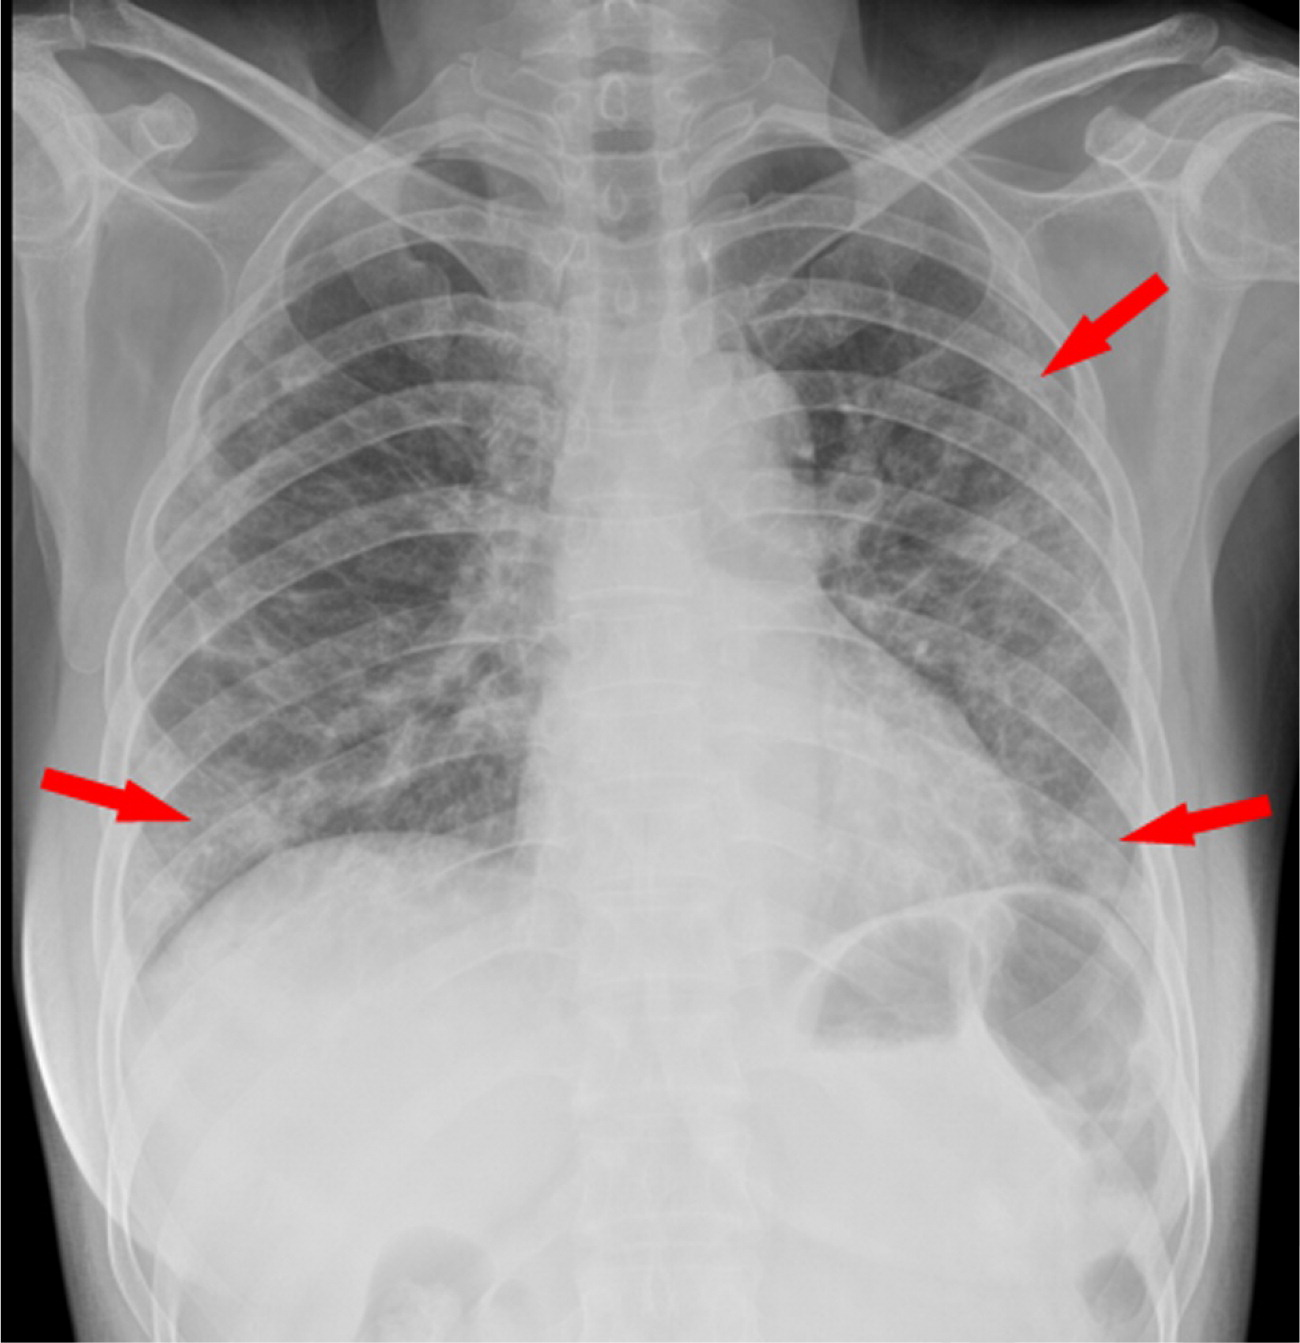

In [32]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

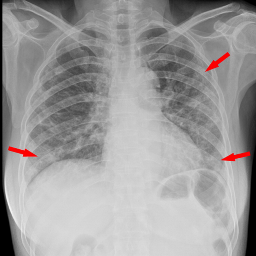

In [33]:
img = cv2.resize(img, (256, 256))
cv2_imshow(img)

In [34]:
img = img / 255
img

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.10980392, 0.10980392, 0.10980392],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.12941176, 0.12941176, 0.12941176],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.16470588, 0.16470588, 0.16470588],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [35]:
img.shape

(256, 256, 3)

In [36]:
img = img.reshape(-1, 256, 256, 3)
img.shape

(1, 256, 256, 3)

In [37]:
predict = modelo_carregado(img)

In [38]:
predict2= np.argmax(predict)
predict2

0

Modelo acertou

In [39]:
label_nomes[predict2], predict[predict2]

('Covid19',
 <tf.Tensor: shape=(4,), dtype=float32, numpy=
 array([9.9999666e-01, 2.4958081e-07, 2.9539538e-06, 1.1407544e-07],
       dtype=float32)>)